# Capstone  - Fake Job Posting - Data Wrangling and Exploratory Data Analysis

### Table of contents
1. [Background](#Background)
     -   1.1 [Data Source](#Data-Source)
     -   1.2 [Objective](#Objective)
     
     
2. [Loading Data](#Loading-Data)
     -   2.1 [Load libraries](#Load-libraries)
     -   2.2 [Load Dataset](#Load-Dataset)
     
     
3. [Data Quality Check](#Data-Quality-Check)
     -   3.1 [Duplicate Values](#Duplicate-Values)
     -   3.2 [Missing Values](#Missing-Values)
     
     
4. [Data Wrangling](#Data-Wrangling)
     -   4.1 [Split the location in Country, State and City](#Split-the-location-in-Country-State-and-City)
     -   4.2 [Split the salary range column to minimum and maximum](#Split-the-salary-range-column-to-minimum-and-maximum)
     -   4.3 [Dealing with missing values](#Dealing-with-missing-values)

## Background
    
Scammers advertise jobs the same way legitimate employers do—online (in ads, on job sites, college employment sites, and social media), in newspapers, and sometimes on TV and radio. They promise you a job, but what they want is your money and your personal information.

Fake Job or Employment Scams occur when criminal actors deceive victims into believing they have a job or a potential job. Criminals leverage their position as “employers” to persuade victims to provide them with personally identifiable information (PII), become unwitting money mules, or to send them money.

Fake Job Scams have existed for a long time but technology has made this scam easier and more lucrative. Cyber criminals now pose as legitimate employers by spoofing company websites and posting fake job openings on popular online job boards. They conduct false interviews with unsuspecting applicant victims, then request PII and/or money from these individuals. 


https://www.fbi.gov/contact-us/field-offices/elpaso/news/press-releases/fbi-warns-cyber-criminals-are-using-fake-job-listings-to-target-applicants-personally-identifiable-information

## What is a Fake Job Posting?

A fake job posting is a (rarely) smartly designed type of scam aimed at job seekers for a variety of unprofessional reasons. Still, these scams can look legit to an unsuspicious person scrolling through the vast pool of jobs. And although most tech talents aren’t actively looking for a new employer, falling for a phantom ad is still realistic. How so?

Scammers will sometimes go the extra mile to draw the attention of their target audience, more often than not, by offering incredibly high salary ranges or another sort of advantage that seems too good to be true. So, make sure to remember this: when a JD seems like a dream come true, do a thorough background check on the company or recruitment agency advertising it. Search through their website, social media, and various job boards before you take a leap of faith and end up wasting your time on a dead-end hiring process, or worse. 

https://www.omnesgroup.com/fake-job-posting/

#### 1.1 Data Source

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

#### 1.2 Problem Statement / Objective
To predicit fradulent job posting in the dataset.

## Loading Data 

#### 2.1 Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
import collections, re

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded all the required libraries.
</div>

#### 2.2 Load Data Set 

In [2]:
df = pd.read_csv('fake_job_postings.csv')

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded data.
</div>

In [3]:
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,job_requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   job_requirements     15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## Data Quality Check

#### 3.1 Duplicate Values

In [7]:
if len(df[df.duplicated(keep=False)]) == 0:
    print("There is no duplicated records in the fake job posting dataset")
else:
    print("There are duplicated records in the fake job posting dataset. Please indetify the reasons and work to fix")

There is no duplicated records in the fake job posting dataset


<div class="alert alert-success">
  <strong>Success!</strong> There is no duplicated values in the dataset.
</div>

#### 3.2 Missing Values

In [8]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
job_requirements        2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


#### 3.3  Graphical representation of missing values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


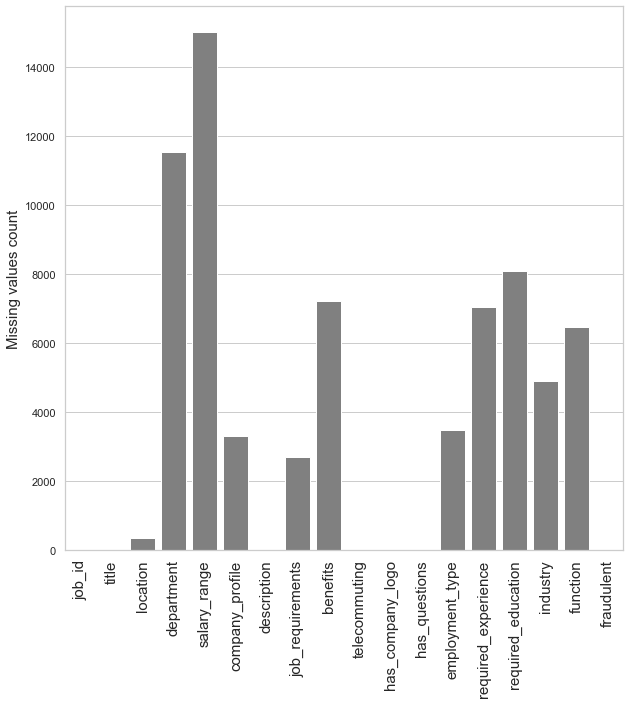

In [9]:
null_values = df.isnull().sum()
plt.figure(figsize = (10,10))
sns.barplot(null_values.index, null_values, color = 'grey')
plt.ylabel('Missing values count', fontsize = 15)
plt.xticks(rotation = '90', fontsize=15)
plt.show()

## Data Wrangling 

#### Job ID

In [10]:
# number of unique job_id 
len(pd.unique(df['job_id']))

17880

<div class="alert alert-info">
  <strong>Info!</strong> job_id is unique identifer in the dataset.
</div>

#### Location 

In [11]:
location = df["location"].str.split(",", expand= True, n= 2)
location.columns = ["country", "state", "city"]
df[["country", "state", "city"]] = location

In [12]:
#drop the original location column from the dataset
df = df.drop(columns= "location")

In [13]:
df['country'] = df['country'].fillna("None")

In [14]:
df['state'] = df['state'].fillna("None")

In [15]:
df['city'] = df['city'].fillna("None")

#### Count of real and fraudulent job posting by Country 

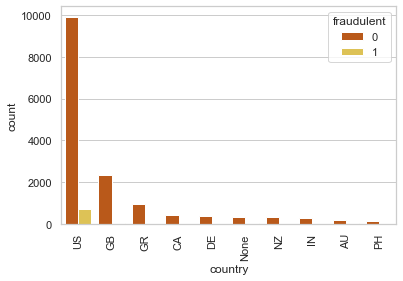

In [16]:
sns.countplot(x='country', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-success">
  <strong>Success!</strong> dropped the original location column and splitted location into City, State and Country
</div>

#### Department

In [17]:
# number of unique department
print(df['department'].value_counts())

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64


In [18]:
df['department'] =df['department'].fillna("None")

In [19]:
df['department']=df['department'].str.lower()
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]')

In [20]:
def clean_string(subject):
    clean_tokens = re.findall(r"(?i)\b[a-z]+\b", subject)
    clean_s = ' '.join(clean_tokens)
    return clean_s

# source: https://github.com/TommyJiang91/Fake_Job_Posting_Detection/blob/master/Data_Cleaning_and_Salary_Matching_Final.ipynb

In [21]:
df['department']= df['department'].apply(lambda x: clean_string(x))

In [22]:
#check the unique values of deparment column
print(df['department'].value_counts())

none                          11547
sales                           582
engineering                     512
marketing                       421
operations                      276
                              ...  
greetsnap development             1
organisational development        1
dsd                               1
program                           1
administrative dept               1
Name: department, Length: 1180, dtype: int64


#### Count of real and fraudulent job posting by department 

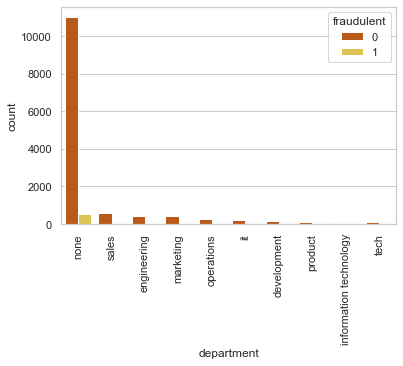

In [23]:
sns.countplot(x='department', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['department'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

Too many unique departments. Lets look at function column technically they should be similar and provide the required information. Also department has 11547 missing information

#### Function 

In [24]:
#check the unique values of function column
df['function'].unique()

array(['Marketing', 'Customer Service', nan, 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

Way less number of functions compared to deparments. Lets consolidate it further. 

In [25]:
#categorize the 37 unique values into 9 categories
df['function'].replace(dict.fromkeys(['Marketing', 'Customer Service', 'Sales', 'Business Development', 'Advertising', 'Public Relations'], 'Marketing'),inplace=True)
df['function'].replace(dict.fromkeys(['Management', 'Administrative', 'General Business', 'Strategy/Planning', 'Consulting'],'General Business'),inplace=True)
df['function'].replace(dict.fromkeys(['Human Resources', 'Training'],'Human Resources'),inplace=True)
df['function'].replace(dict.fromkeys(['Other','Health Care Provider', 'Education', 'Project Management', 'Science', 'Legal'],'Others'),inplace=True)
df['function'].replace(dict.fromkeys(['Information Technology','Data Analyst'],'Information Technology'),inplace=True)
df['function'].replace(dict.fromkeys(['Engineering' ,'Quality Assurance', 'Research'],'Engineering'),inplace=True)
df['function'].replace(dict.fromkeys(['Design', 'Art/Creative', 'Writing/Editing'],'Creative'),inplace=True)
df['function'].replace(dict.fromkeys(['Financial Analyst', 'Business Analyst', 'Finance', 'Accounting/Auditing',],'Finance'),inplace=True)
df['function'].replace(dict.fromkeys(['Distribution', 'Production', 'Purchasing', 'Manufacturing', 'Product Management', 'Supply Chain'],'Manufacturing'),inplace=True)

In [26]:
df['function'] =df['function'].fillna("None")

In [27]:
#now again check unique values
df['function'].unique()

array(['Marketing', 'None', 'Others', 'General Business',
       'Information Technology', 'Engineering', 'Creative',
       'Manufacturing', 'Finance', 'Human Resources'], dtype=object)

In [28]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
function_type_cross = pd.crosstab(df["function"], df["fraudulent"])

In [29]:
function_type_cross

fraudulent,0,1
function,,
Creative,600,4
Engineering,1396,113
Finance,451,50
General Business,1074,131
Human Resources,234,9
Information Technology,1795,36
Manufacturing,374,5
Marketing,3784,137
None,6118,337


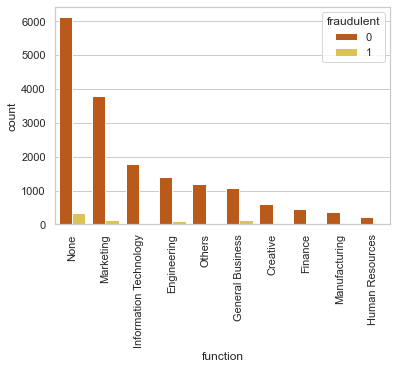

In [30]:
sns.countplot(x='function', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['function'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

I am chose to drop deparment column as it has too many unquie values. Function column provides similar information. Additionally, Title column does not add much value unless I spend sometime on it and categorize the job title based on hierachy or something like indivudual contributor, manager, senior management, leadersship and others

In [31]:
df.drop(['department','title'], axis=1, inplace=True)

In [32]:
df.shape

(17880, 18)

#### Salary Range

In [33]:
salary = df["salary_range"].str.split("-", expand= True, n= 1)
df[["min_salary", "max_salary"]] = salary

In [34]:
df = df.drop(columns= "salary_range")

In [35]:
df['min_salary'] =df['min_salary'].fillna(0)

In [36]:
df['max_salary'] =df['max_salary'].fillna(0)

In [37]:
df.head(2)

,job_id,company_profile,description,job_requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city,min_salary,max_salary
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York,0,0
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Marketing,0,NZ,,Auckland,0,0


<div class="alert alert-success">
  <strong>Success!</strong> Splitted the salary_range into minimum and maxium column and dropped the original salary_range column.
</div>

#### Employment_Type

In [38]:
df['employment_type'].unique()

array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [39]:
df['employment_type'] =df['employment_type'].fillna("None")

#### Count of real and fraudulent job posting by Employment Type

In [40]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
employment_type_cross = pd.crosstab(df["employment_type"], df["fraudulent"])

In [41]:
employment_type_cross

fraudulent,0,1
employment_type,,
Contract,1480,44
Full-time,11130,490
None,3230,241
Other,212,15
Part-time,723,74
Temporary,239,2


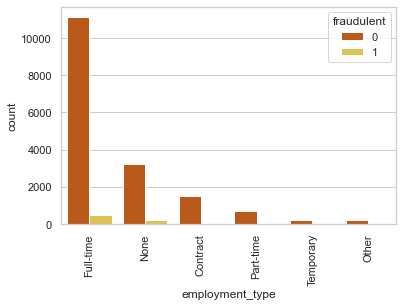

In [42]:
sns.countplot(x='employment_type', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['employment_type'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

#### Required Experience 

In [43]:
df['required_experience'].isnull().sum()

7050

In [44]:
# fill missing required experience with 'none'
df['required_experience'] =df['required_experience'].fillna("None")

In [45]:
# types of required experience 
print(df['required_experience'].value_counts())

None                7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64


#### Count of real and fraudulent job posting by experience 

In [46]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
experience_cross = pd.crosstab(df["required_experience"], df["fraudulent"])
experience_cross

fraudulent,0,1
required_experience,,
Associate,2255,42
Director,372,17
Entry level,2518,179
Executive,131,10
Internship,371,10
Mid-Senior level,3696,113
None,6615,435
Not Applicable,1056,60


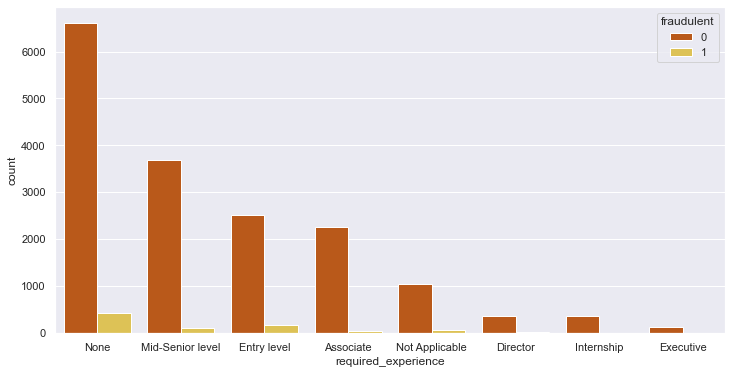

In [47]:
sns.set(rc={"figure.figsize":(12, 6)}) #width=6, height=5
sns.countplot(x='required_experience', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['required_experience'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

#### Required Education

In [48]:
df['required_education'].isnull().sum()

8105

In [49]:
# fill missing required education with 'none'
df['required_education'] =df['required_education'].fillna("None")

In [50]:
# types of required experience 
print(df['required_education'].value_counts())

None                                 8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64


In [51]:
# renaming some of the required education for consistency
df["required_education"]=df["required_education"].replace("Vocational - Degree", "Vocational")
df["required_education"]=df["required_education"].replace("Vocational - HS Diploma", "High School")
df["required_education"]=df["required_education"].replace("Some High School Coursework", "High School")
df["required_education"]=df["required_education"].replace("High School or equivalent", "High School")
df["required_education"]=df["required_education"].replace("Some College Coursework Completed", "Associate")
df["required_education"]=df["required_education"].replace("Unspecified", "None")
df["required_education"]=df["required_education"].replace("Bachelor's Degree", "Bachelor's")
df["required_education"]=df["required_education"].replace("Master's Degree", "Master's")
df["required_education"]=df["required_education"].replace("Associate Degree", "Associate")

#### Count of real and Fake job posting by education 

In [52]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
education_questions_type_cross = pd.crosstab(df["required_education"], df["fraudulent"])
education_questions_type_cross

fraudulent,0,1
required_education,,
Associate,367,9
Bachelor's,5045,100
Certification,151,19
Doctorate,25,1
High School,1926,190
Master's,385,31
None,8990,512
Professional,70,4
Vocational,55,0


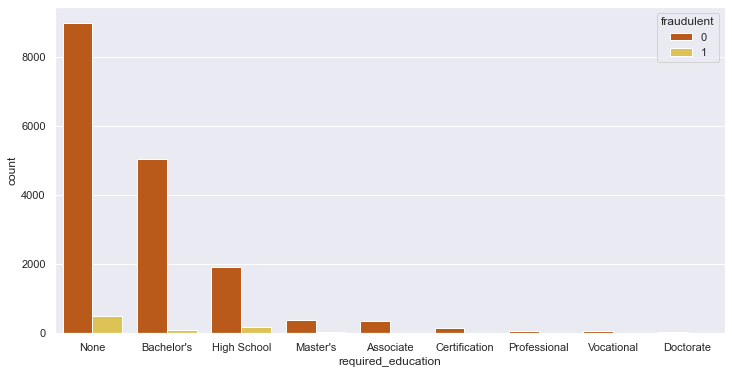

In [53]:
sns.set(rc={"figure.figsize":(12, 6)}) #width=6, height=5
sns.countplot(x='required_education', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['required_education'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

#### Count of real and fraudulent job posting by telecommuting 

In [54]:
df['telecommuting'].isnull().sum()

0

In [55]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
telecommuting_type_cross = pd.crosstab(df["telecommuting"], df["fraudulent"])
telecommuting_type_cross

fraudulent,0,1
telecommuting,,
0,16311,802
1,703,64


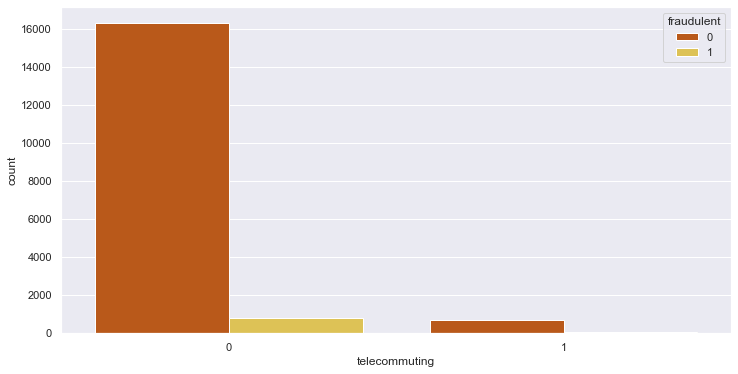

In [56]:
sns.countplot(x='telecommuting', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['telecommuting'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

#### Count of real and fraudulent job posting by has_question

In [57]:
df['has_questions'].isnull().sum()

0

In [58]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
has_questions_type_cross = pd.crosstab(df["has_questions"], df["fraudulent"])

In [59]:
has_questions_type_cross

fraudulent,0,1
has_questions,,
0,8472,616
1,8542,250


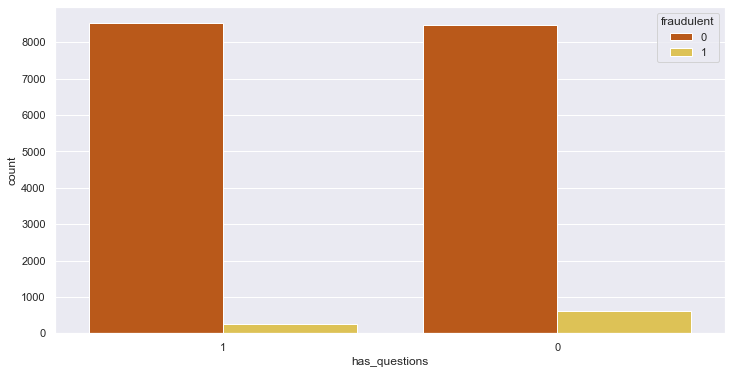

In [60]:
sns.countplot(x='has_questions', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['has_company_logo'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

#### Count of real and fraudulent job posting by has_company_logo

In [61]:
df['has_company_logo'].isnull().sum()

0

In [62]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
has_logo = pd.crosstab(df["has_company_logo"], df["fraudulent"])
has_logo

fraudulent,0,1
has_company_logo,,
0,3077,583
1,13937,283


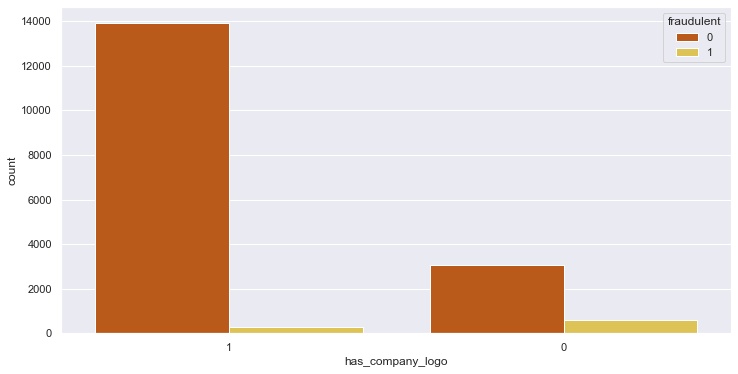

In [63]:
sns.countplot(x='has_company_logo', data=df, hue="fraudulent", palette=['#D35400', "#F4D03F"], order=df['has_company_logo'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

#### Count of real and fradulent by Industry

In [64]:
df['industry'].isnull().sum()

4903

In [65]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
industry_cross = pd.crosstab(df["industry"], df["fraudulent"])
industry_cross

fraudulent,0,1
industry,,
Accounting,102,57
Airlines/Aviation,62,1
Alternative Dispute Resolution,1,0
Animation,3,2
Apparel & Fashion,95,2
...,...,...
Warehousing,50,1
Wholesale,10,1
Wine and Spirits,1,0


There are 131 unique industries in the dataset. Its difficult to consolidate them to lesser number. Probably, its better to drop this column as I will not be utilizing this information.

In [66]:
# drop the industry column
df.drop(['industry'], axis=1, inplace=True)

In [67]:
df.head(2)

,job_id,company_profile,description,job_requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,state,city,min_salary,max_salary
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,None,Marketing,0,US,NY,New York,0,0
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,None,Marketing,0,NZ,,Auckland,0,0


#### Count of real and fradulent job posting 

In [68]:
df['fraudulent'].isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,fraudulent,job_id
0,0,17014
1,1,866


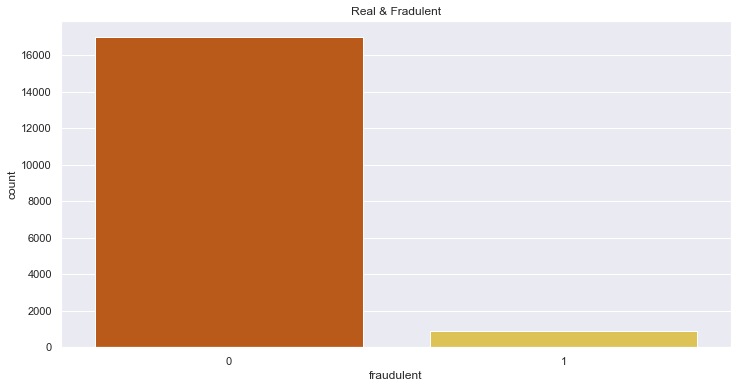

In [69]:
sns.countplot(df.fraudulent,palette=['#D35400', "#F4D03F"]).set_title('Real & Fradulent')
df.groupby('fraudulent').count()['job_id'].reset_index().sort_values(by='job_id',ascending=False)

In [70]:
df.shape

(17880, 18)

In [71]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

#### Description

In [88]:
# change the datatype
df.description = df.description.astype('str')

In [ ]:
#reference: https://www.andyfitzgeraldconsulting.com/writing/keyword-extraction-nlp/

In [89]:
# Add word count for description column in the dataset
df['desc_word_count'] = df['description'].apply(lambda x: len(str(x).split(" ")))

##### identifying keywords in description column

In [90]:
#Getting keywords from the descriptions all rows as text
import docx2txt

# extract text
text = docx2txt.process("text.docx")

# extract text and write images in /tmp/img_dir
text = docx2txt.process("text.docx") 

In [91]:
import spacy
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

In [93]:
import yake
kw_extractor = yake.KeywordExtractor()
# text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
numOfKeywords = 15
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('URL', 7.468196010153859e-07)
('team', 7.613037046334636e-07)
('work', 9.390995833270767e-07)
('Sales', 9.569777433742507e-07)
('customer', 1.0467795717413164e-06)
('service', 1.0512418679248445e-06)
('business', 1.065998647993793e-06)
('services', 1.2618763725907775e-06)
('experience', 1.5900150028648774e-06)
('COMPANY', 1.6602203252666518e-06)
('management', 1.731076329399969e-06)
('Manager', 1.7521477287400568e-06)
('JOB', 1.8538174118243692e-06)
('development', 1.9007967553983298e-06)
('customers', 2.0171550262874936e-06)


In [94]:
# get list of 15 keywords for description column in the dataset
df_keywords = pd.DataFrame(keywords)
keywords_list = df_keywords[0].tolist()
print(keywords_list)

['URL', 'team', 'work', 'Sales', 'customer', 'service', 'business', 'services', 'experience', 'COMPANY', 'management', 'Manager', 'JOB', 'development', 'customers']


In [95]:
for keyword in keywords_list:
    df[keyword] = df['description'].apply(lambda _str: _str.lower().count(keyword))

In [96]:
df.shape

(17880, 35)

In [98]:
# Create List of columns
col_list= ['URL', 'team', 'work', 'Sales', 'customer', 'service', 'business', 'services', 'experience', 'COMPANY', 'management', 'Manager', 'JOB', 'development', 'customers']
# added a new column with count of keywords in description
df['Description_keyword_count'] = df[col_list].sum(axis=1)

In [105]:
# rename description keyowrd column by adding desc as prefix to all 

df.rename(columns={'URL':'desc_URL', 'team': 'desc_team', 'work':'desc_work', 'Sales':'desc_sales', 'customer':'desc_customer', 'service':'desc_service', 'business':'desc_business', 'services':'desc_services', 'experience':'desc_experience', 'COMPANY':'desc_company', 'management':'desc_management', 'Manager':'desc_manager', 'JOB':'desc_job', 'development':'desc_development', 'customers':'desc_customers'}, inplace=True) 

In [ ]:
#drop unwanted columns
df = df.drop(['URL', 'team', 'work', 'Sales', 'customer', 'service', 'business', 'services', 'experience', 'COMPANY', 'management', 'Manager', 'JOB', 'development', 'customers', 'marketing', 'product', 'support', 'Project', 'products', 'data', 'client', 'Design', 'clients', 'RESPONSIBILITIES', 'managers', 'projects', 'position', 'teams', 'web', 'software', 'working', 'develop', 'solutions', 'quality', 'skills', 'role', 'technical', 'Account', 'Systems', 'ensure', 'responsible', 'senior', 'office', 'Engineer', 'time', 'technology', 'lead', 'Jobs', 'engineering', 'apply', 'Developer', 'manage', 'system', 'operations', 'Director', 'opportunity', 'media', 'social', 'ability', 'candidate', 'mobile', 'love', 'duties', 'engineers', 'strong', 'level', 'Perform', 'process', 'professional', 'maintain', 'care', 'developers', 'knowledge', 'digital', 'accounts', 'Youâ', 'email', 'cost', 'communication', 'Weâ', 'Training', 'people', 'requirements', 'required', 'financial', 'high', 'Finance', 'network', 'make', 'Works', 'information', 'candidates', 'including', 'build', 'applications', 'based', 'join', 'Assist', 'key'], axis=1)

In [106]:
df.head()

,job_id,company_profile,description,job_requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,desc_business,desc_services,desc_experience,desc_company,desc_management,desc_manager,desc_job,desc_development,desc_customers,Description_keyword_count
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,...,0,0,0,0,1,0,0,0,0,5
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,...,3,0,1,0,1,0,0,0,0,17
2,3,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,None,None,...,0,0,1,0,0,0,0,0,0,1
3,4,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,...,6,0,1,0,1,0,0,2,2,20
4,5,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,...,0,0,0,0,1,0,0,0,1,7


In [107]:
# whats the min and max keyword in Fradulent job posting 
df_fraudulent = df[df['fraudulent'] == 1] 

In [108]:
df_fraudulent.shape

(866, 36)

In [109]:
minvalue_desc_count_fraudulent = df_fraudulent['Description_keyword_count'].min()

In [110]:
minvalue_desc_count_fraudulent

0

In [111]:
maxvalue_desc_count_fraudulent = df_fraudulent['Description_keyword_count'].max()

In [112]:
maxvalue_desc_count_fraudulent

52

<div class="alert alert-info">
  <strong>Info!</strong> Range of keywords in fraudulent job posting is 0 to 52
</div>

In [113]:
# whats the min and max keyword in Fradulent job posting 
df_not_fraudulent = df[df['fraudulent'] == 0] 

In [114]:
df_not_fraudulent.shape

(17014, 36)

In [115]:
minvalue_desc_count_notfraudulent = df_not_fraudulent['Description_keyword_count'].min()
minvalue_desc_count_notfraudulent

0

In [116]:
maxvalue_desc_count_notfraudulent = df_not_fraudulent['Description_keyword_count'].max()
maxvalue_desc_count_notfraudulent

70

<div class="alert alert-info">
  <strong>Info!</strong> Range of keywords in non fraudulent job posting is 0 to 70
</div>

#### Benefits

In [117]:
# change the datatype
df.benefits = df.benefits.astype('str')

In [118]:
# Add word count for description column in the dataset
df['benefits_word_count'] = df['benefits'].apply(lambda x: len(str(x).split(" ")))

##### identifying keywords in description column

In [119]:
#Getting keywords from the descriptions all rows as text

# extract text
text_benefit = docx2txt.process("benefits.docx")

# extract text and write images in /tmp/img_dir
text_benefit = docx2txt.process("benefits.docx") 

In [120]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

In [122]:
kw_extractor = yake.KeywordExtractor()
# text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
numOfKeywords = 15
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text_benefit)
for kw in keywords:
    print(kw)

('Benefits', 6.391662704993569e-06)
('Competitive', 6.4133974450972345e-06)
('work', 7.569948807467178e-06)
('company', 8.576939187255802e-06)
('dental', 1.2589144267948154e-05)
('paid', 1.2736660789580519e-05)
('Salary', 1.2883489136919035e-05)
('Health', 1.5735008212203234e-05)
('team', 1.614908871977232e-05)
('insurance', 2.0363072300328984e-05)
('URL', 2.2657105907407705e-05)
('Medical', 2.38904423441177e-05)
('opportunity', 2.5963167255650043e-05)
('vision', 2.6110111955113643e-05)
('time', 2.7413634814667663e-05)


In [123]:
# get list of 1000 keywords for description column in the dataset
df_keywords_benefits = pd.DataFrame(keywords)
benefitskeywords_list = df_keywords_benefits[0].tolist()
print(benefitskeywords_list)

['Benefits', 'Competitive', 'work', 'company', 'dental', 'paid', 'Salary', 'Health', 'team', 'insurance', 'URL', 'Medical', 'opportunity', 'vision', 'time']


In [124]:
for keyword in benefitskeywords_list:
    df[keyword] = df['benefits'].apply(lambda _str: _str.lower().count(keyword))

In [125]:
df.shape

(17880, 52)

In [126]:
# Create List of columns
benefit_list= ['Benefits', 'Competitive', 'work', 'company', 'dental', 'paid', 'Salary', 'Health', 'team', 'insurance', 'URL', 'Medical', 'opportunity', 'vision', 'time']

In [127]:
# added a new column with count of keywords in description
df['benefit_keyword_count'] = df[benefit_list].sum(axis=1)

In [128]:
# rename description keyowrd column by adding desc as prefix to all 

df.rename(columns={'Benefits':'benefits_benefits', 'Competitive':'benefits_competitive', 'work':'benefits_work', 'company':'benefits_company', 'dental':'benefits_dental', 'paid':'benefits_paid', 'Salary':'benefits_salary', 'Health':'benefits_health', 'team':'benefits_team', 'insurance':'benefits_insurance', 'URL':'benefits_URL', 'Medical':'benefits_medical', 'opportunity':'benefits_opportunity', 'vision':'benefits_vision', 'time':'benefits_time'}, inplace=True) 

In [ ]:
#drop unwanted columns
df = df.drop(['Benefits', 'Competitive', 'work', 'company', 'dental', 'paid', 'Salary', 'Health', 'team', 'insurance', 'URL', 'Medical', 'opportunity', 'vision', 'time', 'Life', 'Full', 'Career', 'offer', 'vacation', 'services', 'training', 'working', 'free', 'package', 'service', 'employees', 'compensation', 'flexible', 'job', 'Hours', 'great', 'days', 'environment', 'holidays', 'email', 'solutions', 'plan', 'sales', 'pay', 'Benefit', 'offers', 'experience', 'Disability', 'employee', 'office', 'Suite', 'business', 'opportunities', 'Management'], axis=1)

In [130]:
df.head(2)

,job_id,company_profile,description,job_requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,benefits_salary,benefits_health,benefits_team,benefits_insurance,benefits_URL,benefits_medical,benefits_opportunity,benefits_vision,benefits_time,benefit_keyword_count
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nan,0,1,0,Other,Internship,...,0,0,0,0,0,0,0,0,0,0
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,...,0,0,3,0,0,0,1,0,0,7


In [131]:
# whats the min and max keyword in Fradulent job posting 
df_fraudulent = df[df['fraudulent'] == 1] 
df_fraudulent.shape

(866, 53)

In [132]:
minvalue_benefit_count_fraudulent = df_fraudulent['benefit_keyword_count'].min()
minvalue_benefit_count_fraudulent

0

In [133]:
maxvalue_benefit_count_fraudulent = df_fraudulent['benefit_keyword_count'].max()
maxvalue_benefit_count_fraudulent

14

<div class="alert alert-info">
  <strong>Info!</strong> Range of keywords in fraudulent job posting is 0 to 14
</div>

In [134]:
# whats the min and max keyword in Fradulent job posting 
df_not_fraudulent = df[df['fraudulent'] == 0] 
df_not_fraudulent.shape

(17014, 53)

In [135]:
minvalue_desc_count_notfraudulent = df_not_fraudulent['benefit_keyword_count'].min()
minvalue_desc_count_notfraudulent

0

In [136]:
maxvalue_desc_count_notfraudulent = df_not_fraudulent['benefit_keyword_count'].max()
maxvalue_desc_count_notfraudulent

40

<div class="alert alert-info">
  <strong>Info!</strong> Range of keywords in not fraudulent job posting is 0 to 40
</div>

#### Requirements

In [137]:
# change the datatype
df.job_requirements = df.job_requirements.astype('str')

In [138]:
# Add word count for description column in the dataset
df['requirements_word_count'] = df['job_requirements'].apply(lambda x: len(str(x).split(" ")))

##### identifying keywords in description column

In [140]:
#Getting keywords from the descriptions all rows as text
# extract text
text_requirements = docx2txt.process("requirements.docx")

# extract text and write images in /tmp/img_dir
text_requirements = docx2txt.process("requirements.docx") 

In [142]:
kw_extractor = yake.KeywordExtractor()
# text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
numOfKeywords = 15
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text_requirements)
for kw in keywords:
    print(kw)

('Experience', 2.1862549389497554e-07)
('skills', 1.0239849047104893e-06)
('Ability', 1.2501450003009191e-06)
('knowledge', 2.2968326257311163e-06)
('work', 2.3300814524952695e-06)
('strong', 3.4033211497813405e-06)
('degree', 3.5563502935837285e-06)
('management', 3.7027671416295353e-06)
('years', 4.0510231149671274e-06)
('English', 4.5557571674420705e-06)
('Excellent', 4.938562308429698e-06)
('business', 5.055445582913477e-06)
('minimum', 5.42183826916109e-06)
('communication', 5.559624943882737e-06)
('sales', 5.8784740416797125e-06)


In [143]:
# get list of 1000 keywords for description column in the dataset
df_keywords_requirements = pd.DataFrame(keywords)
requirementskeywords_list = df_keywords_requirements[0].tolist()
print(requirementskeywords_list)

['Experience', 'skills', 'Ability', 'knowledge', 'work', 'strong', 'degree', 'management', 'years', 'English', 'Excellent', 'business', 'minimum', 'communication', 'sales']


In [144]:
for keyword in requirementskeywords_list:
    df[keyword] = df['job_requirements'].apply(lambda _str: _str.lower().count(keyword))

In [145]:
df.shape

(17880, 69)

In [146]:
df.head()

,job_id,company_profile,description,job_requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,strong,degree,management,years,English,Excellent,business,minimum,communication,sales
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nan,0,1,0,Other,Internship,...,0,0,1,0,0,0,0,0,1,0
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,...,0,0,3,0,0,0,0,0,1,0
2,3,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,nan,0,1,0,None,None,...,0,0,0,0,0,0,0,0,0,0
3,4,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,...,1,0,0,1,0,0,3,0,1,2
4,5,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,...,1,0,0,1,0,0,0,0,1,0


In [148]:
# Create List of columns
requirements_list = ['Experience', 'skills', 'Ability', 'knowledge', 'work', 'strong', 'degree', 'management', 'years', 'English', 'Excellent', 'business', 'minimum', 'communication', 'sales']

# added a new column with count of keywords in description
df['requirements_keyword_count'] = df[requirements_list].sum(axis=1)

In [149]:
df.rename(columns={'Experience':'requirements_experience', 'skills':'requirements_skills', 'Ability':'requirements_ability', 'knowledge':'requirements_knowledge', 'work':'requirements_work', 'strong':'requirements_strong', 'degree':'requirements_degree', 'management':'requirements_management', 'years':'requirements_years', 'English':'requirements_english', 'Excellent':'requirements_excellent', 'business':'requirement_business', 'minimum':'requirements_minimum', 'communication':'requirements_communication', 'sales':'requirements_sales'}, inplace=True) 

In [ ]:
#drop unwanted columns
df = df.drop(['Experience', 'skills', 'Ability', 'knowledge', 'work', 'strong', 'degree', 'management', 'years', 'English', 'Excellent', 'business', 'minimum', 'communication', 'sales', 'computer', 'required', 'web', 'working', 'design', 'development', 'service', 'Excel', 'Requirements', 'Microsoft', 'team', 'QUALIFICATIONS', 'URL', 'Office', 'customer', 'good', 'marketing', 'High', 'Science', 'services', 'software', 'data', 'Word', 'engineering', 'project', 'SQL', 'understanding', 'HTML', 'University', 'job', 'projects', 'written', 'CSS', 'systems', 'technical'], axis=1)

In [151]:
df.shape

(17880, 70)

In [152]:
# whats the min and max keyword in Fradulent job posting 
df_fraudulent = df[df['fraudulent'] == 1] 
df_fraudulent.shape

minvalue_requirements_count_fraudulent = df_fraudulent['requirements_keyword_count'].min()
minvalue_requirements_count_fraudulent

maxvalue_requirements_count_fraudulent = df_fraudulent['requirements_keyword_count'].max()
maxvalue_requirements_count_fraudulent

28

<div class="alert alert-info">
  <strong>Info!</strong> Range of keywords in fraudulent job posting is 0 to 28
</div>

In [153]:
# whats the min and max keyword in Fradulent job posting 
df_not_fraudulent = df[df['fraudulent'] == 0] 
df_not_fraudulent.shape

minvalue_requirements_count_notfraudulent = df_not_fraudulent['requirements_keyword_count'].min()
minvalue_requirements_count_notfraudulent

maxvalue_requirements_count_notfraudulent = df_not_fraudulent['requirements_keyword_count'].max()
maxvalue_requirements_count_notfraudulent

53

<div class="alert alert-info">
  <strong>Info!</strong> Range of keywords in not fraudulent job posting is 0 to 53
</div>

As I have captured the top 10-15 keyword and count for the text columns. I will drop the original columns - company_profile, descriptions, benefits, requirements

Lets also get rid of state and city columns

In [170]:
df.drop(['company_profile', 'description', 'job_requirements','benefits','state','city'],axis=1, inplace=True)

In [171]:
df.columns

Index(['job_id', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'function', 'fraudulent', 'country', 'min_salary', 'max_salary',
       'company_word_count', 'desc_word_count', 'desc_URL', 'desc_team',
       'desc_work', 'desc_sales', 'desc_customer', 'desc_service',
       'desc_business', 'desc_services', 'desc_experience', 'desc_company',
       'desc_management', 'desc_manager', 'desc_job', 'desc_development',
       'desc_customers', 'Description_keyword_count', 'benefits_word_count',
       'benefits_benefits', 'benefits_competitive', 'benefits_work',
       'benefits_company', 'benefits_dental', 'benefits_paid',
       'benefits_salary', 'benefits_health', 'benefits_team',
       'benefits_insurance', 'benefits_URL', 'benefits_medical',
       'benefits_opportunity', 'benefits_vision', 'benefits_time',
       'benefit_keyword_count', 'requirements_word_count',
       'requirements_experience', 

In [172]:
df.to_csv('fake_job_posting_new.csv')